In [184]:
import pandas as pd

In [185]:
results_p = pd.read_pickle("df.pickle")
results_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3685 entries, 202001010101 to 202002020612
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   着順            3685 non-null   int64         
 1   枠             3685 non-null   int64         
 2   馬番            3685 non-null   int64         
 3   馬名            3685 non-null   object        
 4   斤量            3685 non-null   float64       
 5   騎手            3685 non-null   object        
 6   人気            3685 non-null   float64       
 7   性             3685 non-null   object        
 8   齢             3685 non-null   int64         
 9   体重            3685 non-null   int64         
 10  体重変化          3685 non-null   int64         
 11  date          3685 non-null   datetime64[ns]
 12  race_type     3685 non-null   object        
 13  course_ren    3685 non-null   object        
 14  weather       3685 non-null   object        
 15  ground_state  3685 non-n

In [186]:
results_p["rank"] = results_p["着順"].map(lambda x: 1 if x < 4 else 0)

results_p["rank"].value_counts()

0    2753
1     932
Name: rank, dtype: int64

In [187]:
def split_data(df, test_size):
  # ソート
  sorted_id_list = df.sort_values('date').index.unique()
  # データの分割
  train_id_list = sorted_id_list[:round(len(sorted_id_list) * (1-test_size))]
  test_id_list = sorted_id_list[round(len(sorted_id_list) * (1-test_size)):]
  
  train = df.loc[train_id_list]
  test = df.loc[test_id_list]
  return train, test

In [188]:
results_p.drop(["馬名"],axis=1,inplace=True)
results_d = pd.get_dummies(results_p)
train,test = split_data(results_d,0.3)

In [189]:
X_train = train.drop(["rank","date"],axis=1)
y_train = train["rank"]
X_test = test.drop(["rank","date"],axis=1)
y_test = test["rank"]

ランダムフォレスト

In [190]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=100)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=100)

In [191]:
y_pred = rf.predict_proba(X_test)[:,1]
y_pred

array([0.87, 0.9 , 0.16, ..., 0.01, 0.02, 0.01])

In [192]:
# y_test

In [205]:
len(y_pred)

1137

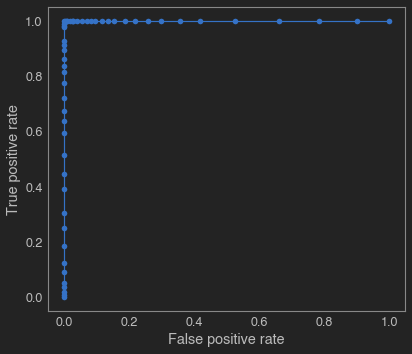

In [194]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot

# https://github.com/dunovank/jupyter-themes
# jtplot.style(theme="monokai")

fpr,tpr,thresholds = roc_curve(y_test,y_pred)
plt.plot(fpr,tpr,marker="o")
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [195]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.002331  , 0.004662  ,
       0.00699301, 0.00932401, 0.01631702, 0.02214452, 0.02564103,
       0.02797203, 0.03846154, 0.05477855, 0.06993007, 0.08275058,
       0.09440559, 0.11538462, 0.13286713, 0.15151515, 0.18648019,
       0.21678322, 0.25641026, 0.2983683 , 0.35664336, 0.41841492,
       0.52564103, 0.66200466, 0.78321678, 0.9009324 , 1.        ])

In [196]:
tpr

array([0.        , 0.00716846, 0.01792115, 0.03584229, 0.05017921,
       0.09318996, 0.12544803, 0.18637993, 0.25089606, 0.3046595 ,
       0.390681  , 0.44444444, 0.51612903, 0.59498208, 0.63799283,
       0.67383513, 0.72043011, 0.77419355, 0.81362007, 0.83512545,
       0.86021505, 0.89247312, 0.91039427, 0.92473118, 0.97849462,
       0.98207885, 0.98924731, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

In [197]:
thresholds

array([1.98, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89,
       0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78,
       0.77, 0.76, 0.71, 0.7 , 0.67, 0.58, 0.28, 0.26, 0.24, 0.23, 0.22,
       0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13, 0.12, 0.11,
       0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02, 0.01, 0.  ])

In [198]:
roc_auc_score(y_test,y_pred)

1.0

In [199]:
y_pred_train = rf.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred_train)

1.0

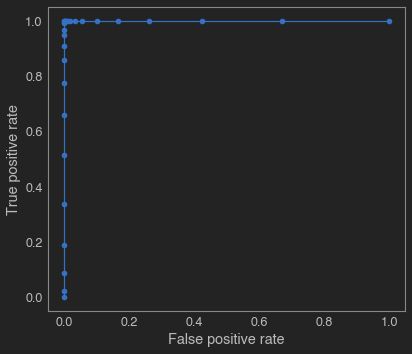

In [200]:
fpr,tpr,thresholds = roc_curve(y_train,y_pred_train)
plt.plot(fpr,tpr,marker="o")
plt.xlabel("False positive rate")
plt.ylabel('True positive rate')
plt.grid()
plt.show()

In [201]:
y_train.value_counts()

0    1895
1     653
Name: rank, dtype: int64

In [202]:
params = {
  "min_samples_split":500,
  "max_depth": None,
  "n_estimators":60,
  "criterion":"entropy",
  "class_weight":"balanced",
  "random_state":100
}

In [203]:
rf = RandomForestClassifier(**params)
rf.fit(X_train,y_train)
y_pred_train = rf.predict_proba(X_train)[:,1]
y_pred = rf.predict_proba(X_test)[:,1]

In [204]:
print(roc_auc_score(y_train,y_pred_train))
print(roc_auc_score(y_test,y_pred))

1.0
1.0


In [210]:
imprtances = pd.DataFrame({"fetures": X_train.columns, "importance": rf.feature_importances_})

In [212]:
imprtances.sort_values('importance',ascending=False)

,fetures,importance
0,着順,6.173514e-01
4,人気,1.687676e-01
18,騎手_ルメー,2.601277e-02
10,騎手_▲山田,2.154581e-02
84,騎手_黛,1.498656e-02
5,齢,1.303082e-02
56,騎手_武豊,1.132035e-02
55,騎手_横山武,8.883538e-03
2,馬番,8.629757e-03
3,斤量,8.078140e-03
